<a href="https://colab.research.google.com/github/PolyGon-13/AI_Study/blob/main/OCR_Read/OCR_Read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR 모델 실행하기

In [ ]:
!wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
!pip install -r requirements-colab.txt

!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

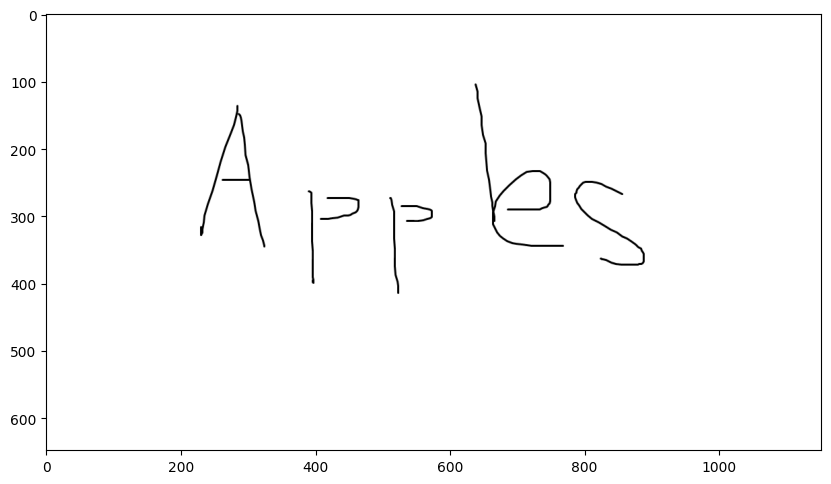

In [ ]:
image=Image.open("apple.png").convert("RGB")

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis("on")
plt.show()

In [ ]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

In [ ]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values
token_ids = model.generate(pixel_values)
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [ ]:
text_from_image

'Apples'

# 애플리케이션 구현하기

In [ ]:
!wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
!pip install -r requirements-colab.txt

!mkdir examples
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello_cursive.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Red.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/i_love_you.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/merrychristmas.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Rock.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Bob.png

In [ ]:
import os
import gradio as gr
import numpy as np
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [ ]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    image=gr.Image(label="Handwritten image file")
    output=gr.Textbox(label="Output Box")
    convert_btn=gr.Button("Convert")

In [ ]:
app.launch(inline=False,share=True)

In [ ]:
app.close()

In [ ]:
class TrOCRInferencer:
    def __init__(self):
        print("[INFO] Initialize TrOCR Inferencer.")
        self.processor=TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
        self.model=VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

    def inference(self,image:Image)->str:
        pixel_values=self.processor(images=image,return_tensors="pt").pixel_values
        generated_ids=self.model.generate(pixel_values)
        generated_text=self.processor.batch_decode(generated_ids,skip_special_tokens=True)[0]

        return generated_text

In [ ]:
inferencer=TrOCRInferencer()

In [ ]:
def image_to_text(image:np.ndarray)->str:
    image=Image.fromarray(image).convert("RGB")
    text=inferencer.inference(image)
    return text

In [ ]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    image=gr.Image(label="Handwritten image file")
    output=gr.Textbox(label="Output Box")
    convert_btn=gr.Button("Convert")
    convert_btn.click(fn=image_to_text,inputs=image,outputs=output)

app.launch(inline=False,share=True)

In [ ]:
app.close()

In [ ]:
with gr.Blocks() as app:
    gr.Markdown("# Handwritten Image OCR")
    sketchpad=gr.Sketchpad(
        label="Handwritten Sketchpad",
        shape=(600,192),
        brush_radius=2,
        invert_colors=False,
    )
    output=gr.Textbox(label="Output Box")
    convert_btn=gr.Button("Convert")
    convert_btn.click(fn=image_to_text,inputs=sketchpad,outputs=output)

app.launch(inline=False,share=True)

In [ ]:
app.close()